### Heart Disease Prediction

In this machine learning project, I have collected the dataset from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to predict whether any person is suffering from heart disease....

In [25]:
### import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') ## for ignore the warnings 

In [2]:
## load the dataset...
df = pd.read_csv('heart.csv')
df.sample(5) ## check the random 5 rows...

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
60    71    0   2       110   265    1        0      130      0      0.0   
187   54    1   0       124   266    0        0      109      1      2.2   
280   42    1   0       136   315    0        1      125      1      1.8   
16    58    0   2       120   340    0        1      172      0      0.0   
84    42    0   0       102   265    0        0      122      0      0.6   

     slope  ca  thal  target  
60       2   1     2       1  
187      1   1     3       0  
280      1   0     1       0  
16       2   0     2       1  
84       1   0     2       1

### Exploratory data analysis (EDA)

In [3]:
## chcek the dataset values types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
## check any null value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
## check the quantile range
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### data Visualization

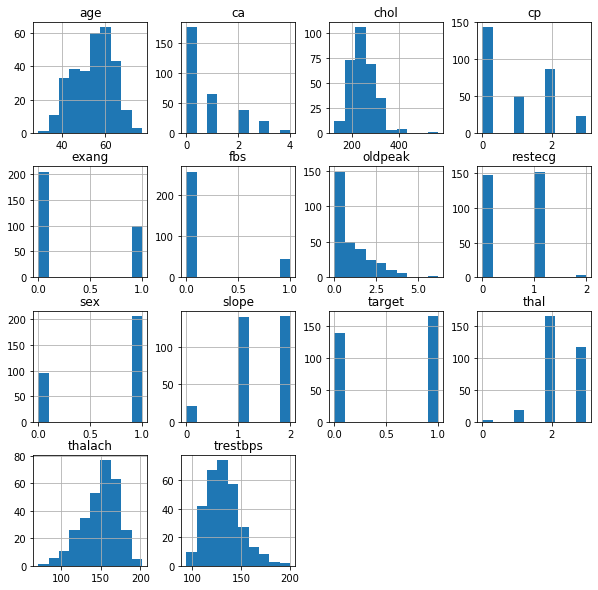

In [6]:
## Plotting histogram for the entire dataset
fig = plt.figure(figsize=(10,10))
g = df.hist(ax = fig.gca())

<IPython.core.display.Javascript object>

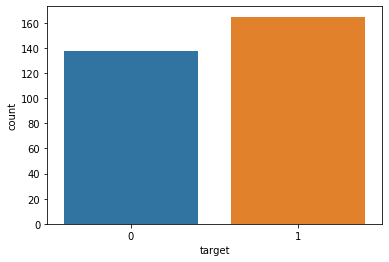

In [7]:
## Check the data are balanced or not... 
sns.countplot(x='target',data=df)
## so it's Balanced...

## Feature Engineering
### Feature Selection

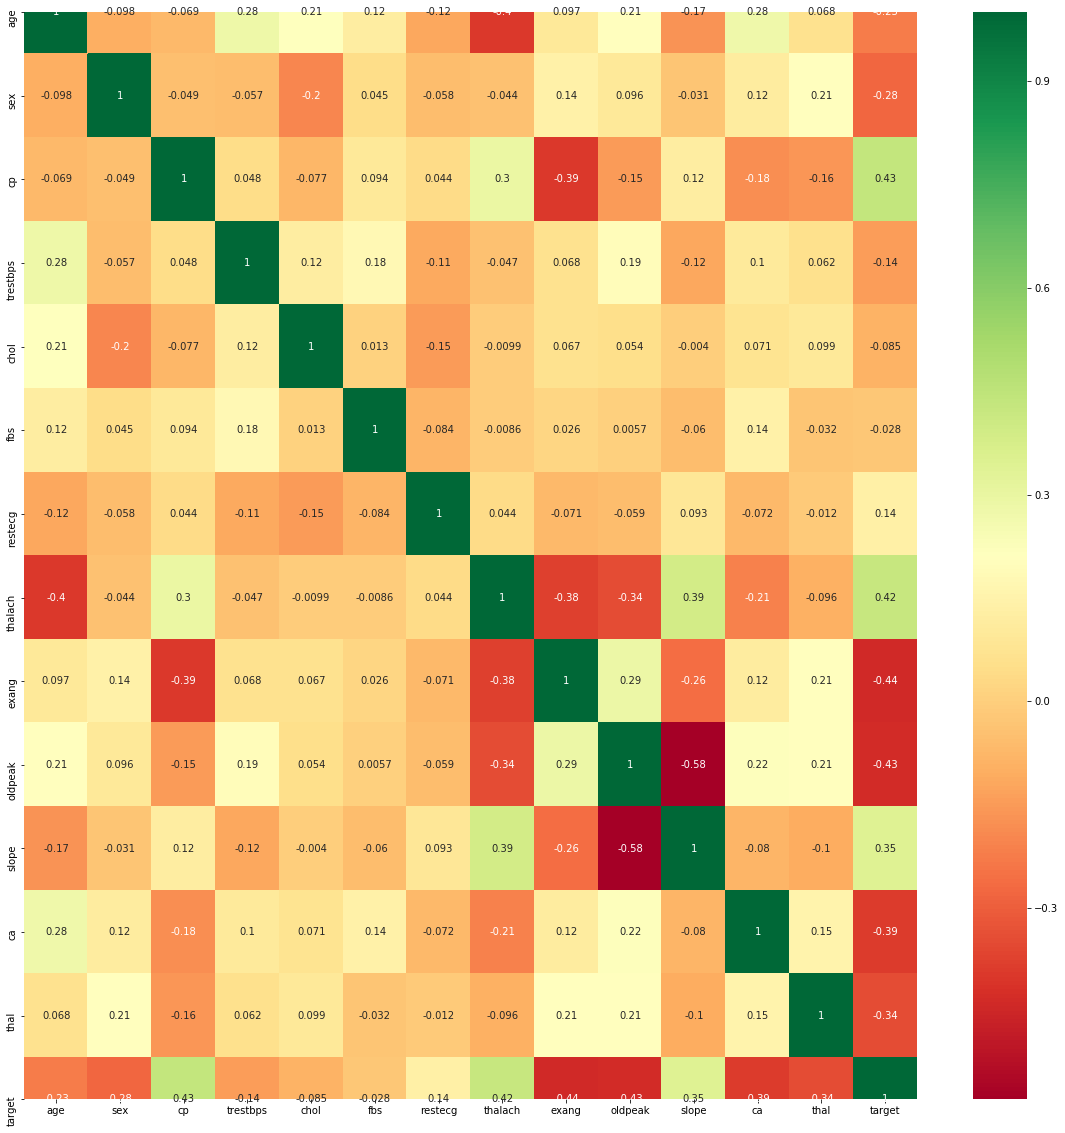

In [8]:
## check the coorelatio using heatmap...
import seaborn as sns
## get the correlation of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
## plot the Heatmap
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Data Processing

#### Handling categorical features:

After exploring the dataset, I observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.


Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.

In [9]:
### create the dummpy coloumns
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

### Feature Scaling

In [10]:
## Scale the dataset using StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
## check now the scaled dataset 
dataset.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   

   cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
0     0     0  ...        0     1     0     0     0     0       0       1   
1     0     0  ...        0     1     0     0     0     0       0       0   
2     0     1  ...        1     1     0     0     0     0       0       0   
3     0     1  ...        1     1     0     0     0     0       0       0   
4     1     0  ...        1     1     0     0     0     0       0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 31 columns]

In [12]:
# Splitting the dataset into dependent and independent features
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

## Model Building
Here I will be experimenting with 3 algorithms:
    1. KNN Classifier
    2. DT Classifier
    3. Random Forest Classifier

In [13]:
# Import the libaries....
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Using "KNN Classification"

In [14]:
# Finding the best accuracy for knn algorithm using cross_val_score 
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [15]:
## check the best score
print(knn_scores)
print("*"*60)
print("Best score : ",max(knn_scores))

[0.7455913978494624, 0.7591397849462365, 0.8120430107526883, 0.8053763440860215, 0.8348387096774192, 0.831505376344086, 0.8416129032258064, 0.8417204301075267, 0.8449462365591398, 0.8448387096774193, 0.8381720430107527, 0.8448387096774195, 0.841505376344086, 0.8415053763440861, 0.8280645161290323, 0.8381720430107527, 0.8280645161290323, 0.8249462365591398, 0.821505376344086, 0.8250537634408601]
************************************************************
Best score :  0.8449462365591398


In [16]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1, 21)], knn_scores, 'r-.*')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
### so the n_neighbors = 12 give the best accuracy...

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

In [17]:
# Training the knn classifier model with k value as 12
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
print("KNeighbours Classifier Accuracy with K=12 is: ",np.round(score.mean()*100,4),"%")

KNeighbours Classifier Accuracy with K=12 is:  84.4839 %


## Using DT Classifier

In [18]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
decision_scores = []
for i in range(1, 11):
    decision_classifier = DecisionTreeClassifier(max_depth=i)
    cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
    decision_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

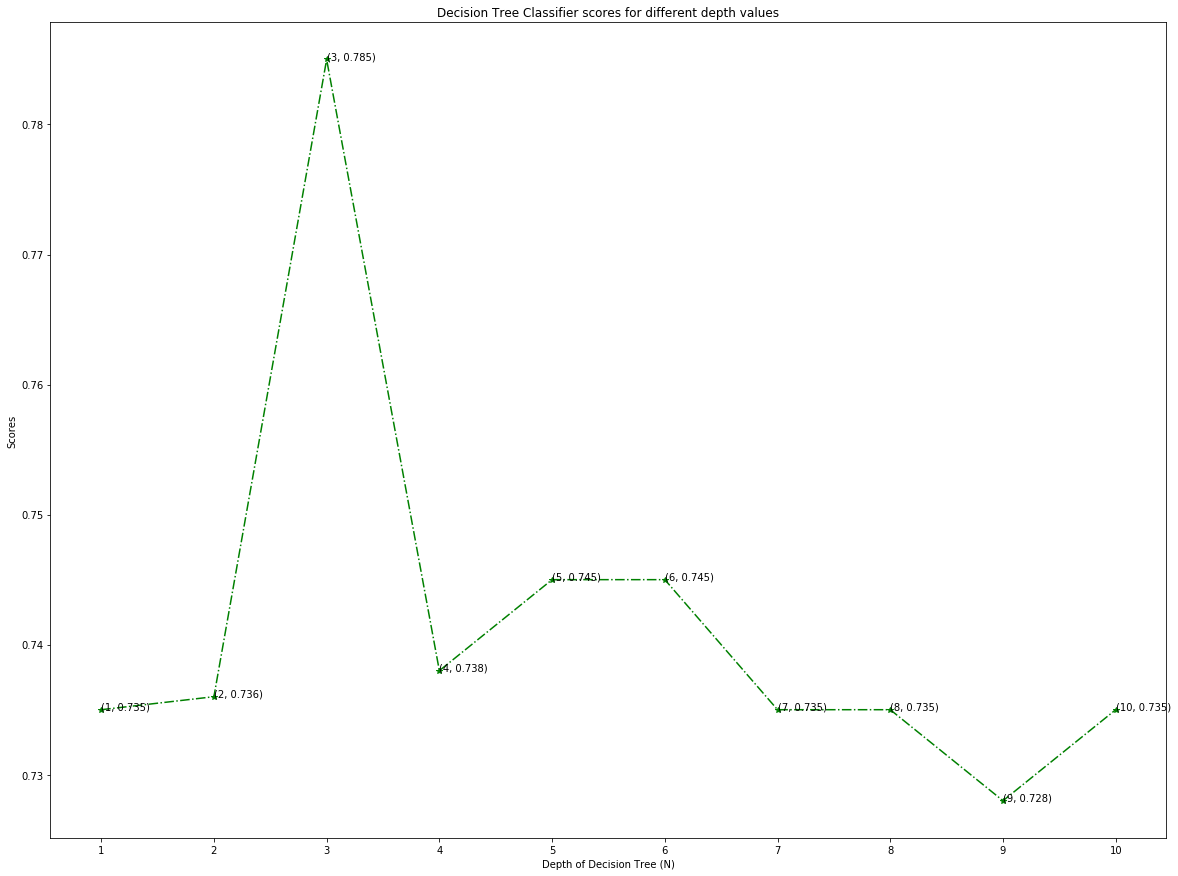

In [19]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], decision_scores, 'g-.*')
for i in range(1,11):
    plt.text(i, decision_scores[i-1], (i, decision_scores[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [20]:
# Training the decision tree classifier model with max_depth value as 3
decision_classifier = DecisionTreeClassifier(max_depth=3)
cvs_scores = cross_val_score(decision_classifier, X, y, cv=10)
print("Decision Tree Classifier Accuracy with max_depth=3 is: ",np.round(cvs_scores.mean()*100,4),"%")

Decision Tree Classifier Accuracy with max_depth=3 is:  78.5054 %


## Using Random Forest Classifier

In [21]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
    forest_classifier = RandomForestClassifier(n_estimators=i)
    cvs_scores = cross_val_score(forest_classifier, X, y, cv=5)
    forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

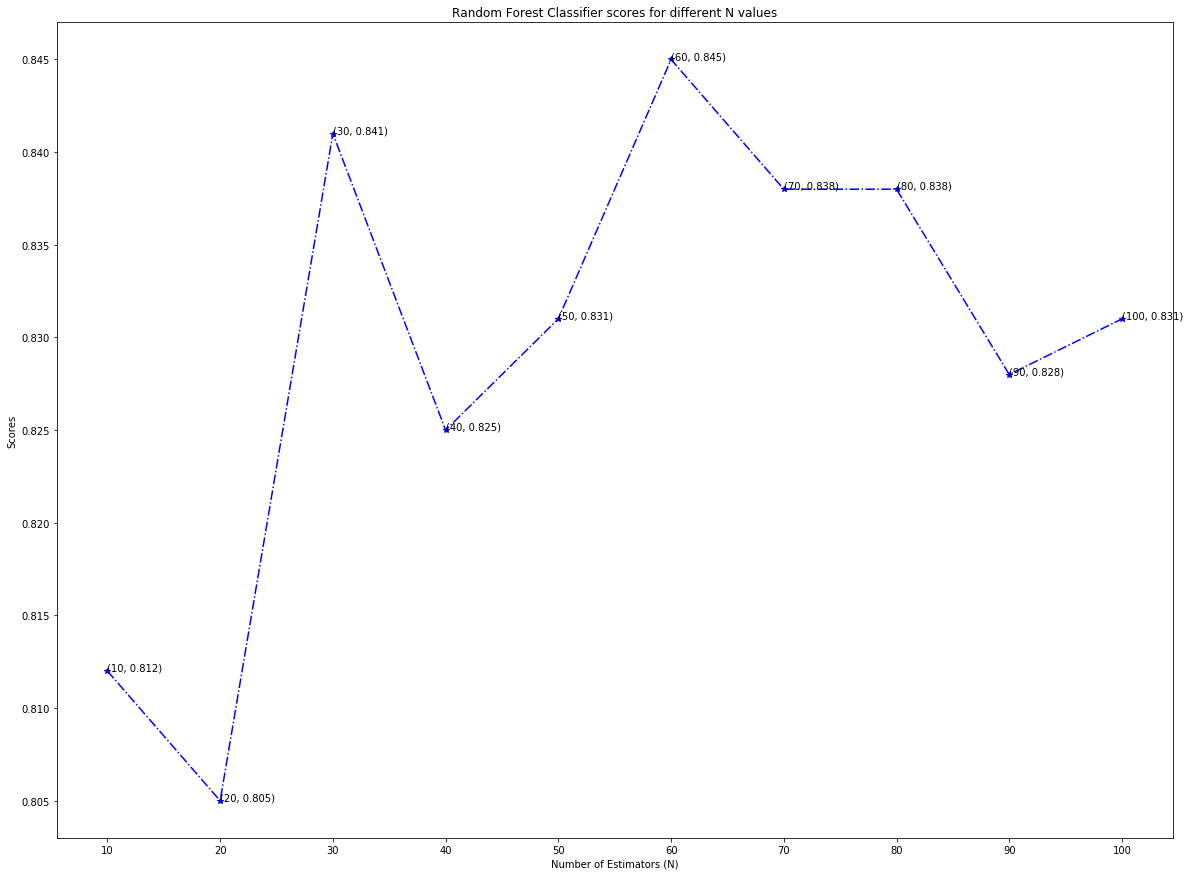

In [22]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, 'b-.*')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [23]:
# Training the random forest classifier model with n value as 60
randomforest_classifier= RandomForestClassifier(n_estimators=60)
scores=cross_val_score(randomforest_classifier,X,y,cv=10)

In [24]:
print("Random Forest Classifier Accuracy with n_estimators=60 is: ",round(scores.mean()*100,4),"%")

Random Forest Classifier Accuracy with n_estimators=60 is:  84.7849 %


**Note : we get maximum accuracy using the Random Forest Classifier**